In [1314]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1315]:
%autoreload 2

In [0]:
# Import pandas
import pandas as pd


In [29]:
# reading csv file
df = pd.read_csv("/Volumes/Workspace/whylabs-processing-core/murmuration/output.csv",
                 header=None, index_col="ts",
                 names=["label", "ts", "lower", "upper", "value", "replacement"])
print(df.dtypes)

label           object
lower          float64
upper          float64
value          float64
replacement    float64
dtype: object


In [20]:
print(df)


                 label       lower       upper       value  replacement
ts                                                                     
1686182400000  without  422.411595  660.452850  492.243877          NaN
1686268800000  without  423.728110  646.839248  699.176639   738.211566
1686355200000  without  435.707723  671.280294  527.096900          NaN
1686441600000  without  439.491028  662.217566  499.834733          NaN
1686528000000  without  439.453634  652.978676  526.961221          NaN
...                ...         ...         ...         ...          ...
1693008000000     with  492.913746  618.827725  600.011621          NaN
1693094400000     with  493.609559  619.146645  595.667796          NaN
1693180800000     with  494.277428  619.371724  346.688311   519.229214
1693267200000     with  494.083856  618.720456  477.635565   581.873835
1693353600000     with  494.659826  618.710524  242.683098   438.341541

[168 rows x 5 columns]


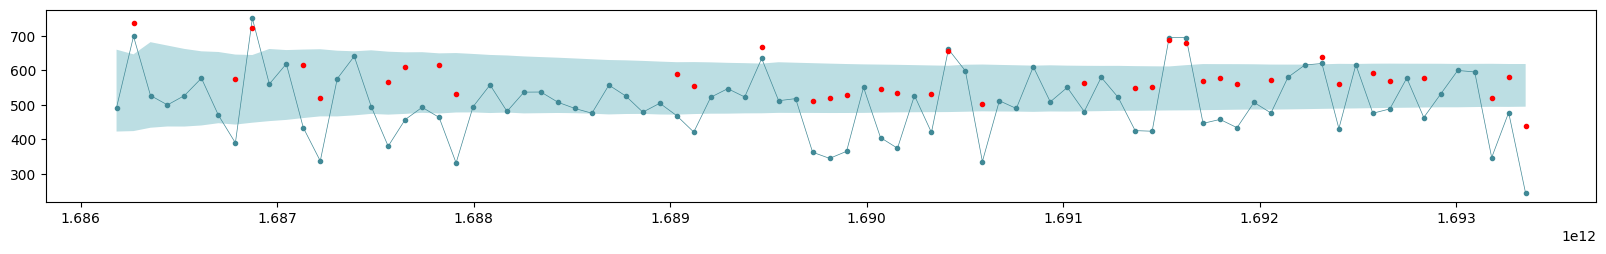

In [30]:
import matplotlib.pyplot as plt

rdf = pd.DataFrame(df)
result = rdf.copy()
result = result[(df.label == "with")]
ribboncolor = tuple(e / 256 for e in (189, 223, 228))
linecolor = tuple(e / 256 for e in (65, 138, 151))

fig, ax = plt.subplots(1)
fig.set_size_inches(20, 2.5)

# do not plot missing data points.
# this accurately reflects real monitor results.
ax.plot(result.index, result['value'], marker='o', markersize=3, lw=.5, label='mean', color=linecolor)
ax.fill_between(result.index, result.lower, result.upper, facecolor=ribboncolor)
ax.plot(result.index, result['replacement'], marker='o', markersize=3, lw=0, color="red")


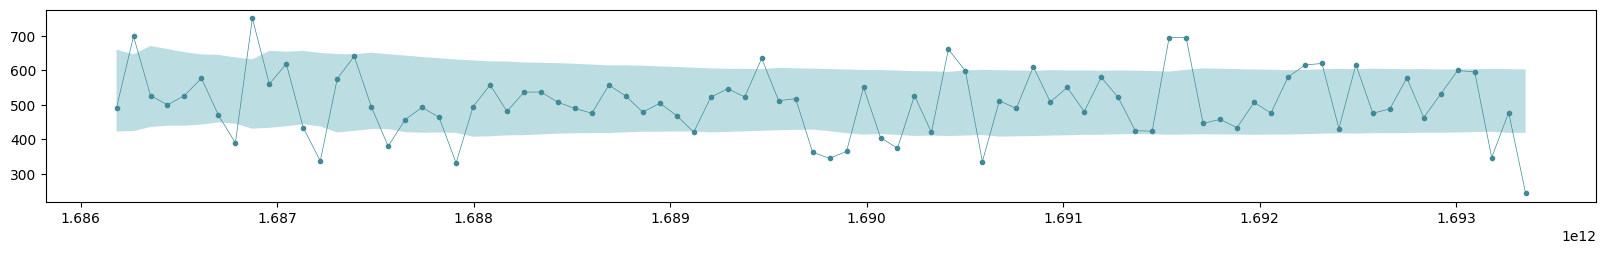

In [31]:
rdf = pd.DataFrame(df)
result = rdf.copy()
result = result[(df.label == "without")]
ribboncolor = tuple(e / 256 for e in (189, 223, 228))
linecolor = tuple(e / 256 for e in (65, 138, 151))

fig, ax = plt.subplots(1)
fig.set_size_inches(20, 2.5)

# do not plot missing data points.
# this accurately reflects real monitor results.
ax.plot(result.index, result['value'], marker='o', markersize=3, lw=.5, label='mean', color=linecolor)
ax.fill_between(result.index, result.lower, result.upper, facecolor=ribboncolor)
ax.plot(result.index, result['replacement'], marker='o', markersize=3, lw=0, color="red")


In [16]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


def visualize(z, limit=90, max_limit=None, min_limit=None, start=0, end=-1):
    rdf = pd.DataFrame(z)
    result = rdf.copy()
    result.index = df.timestamp[1:]
    result['real'] = df['median']

    result = result[start:end]
    result["alert"] = result.apply(
            lambda row: row["actual"] if row['alertCount'] > 0 else None, axis=1)

    result["replacement_"] = result.apply(
            lambda row: row["replacementValue"] if row['shouldReplace'] else None, axis=1)

    ribboncolor = tuple(e / 256 for e in (189, 223, 228))
    linecolor = tuple(e / 256 for e in (65, 138, 151))

    fig, ax = plt.subplots(1)
    fig.set_size_inches(20, 2.5)

    # do not plot missing data points.
    # this accurately reflects real monitor results.
    ax.plot(result.index, result['actual'], marker='o', markersize=3, lw=.5, label='Median', color=linecolor)
    ax.fill_between(result.index, result.lowerThreshold, result.upperThreshold, facecolor=ribboncolor)
    ax.plot(result.index, result['value'], marker='o', markersize=1, lw=0, color="black")
    ax.plot(result.index, result['adjustedPrediction'], marker='o', markersize=3, lw=0, color="pink")


    ax.plot(result.index, result['alert'], marker='o', markersize=2, lw=0, color="red")
    ax.plot(result.index, result['replacement_'], marker='o', markersize=2, lw=0, color="orange")

    ax.set_title(f'{model_id} pmdarim ARIMA forecast, 90-day baseline, 95% CI (lambda_keep=0.5, adj_tries=10, oob=1)')

    ax.legend(loc='upper left')
    ax.set_ylabel('est. median', fontweight='bold')
    ax.grid()
    if min_limit is not None and max_limit is not None:
        plt.ylim([min_limit, max_limit])
    plt.show()


ModuleNotFoundError: No module named 'matplotlib'